In [1]:
# load the data
import numpy as np
X = np.load('X.npy')
y = np.load('y.npy')

# convert classes to vector
from keras.utils import np_utils
nb_classes = 2
y = np_utils.to_categorical(y, nb_classes).astype(np.float32)

# shuffle all the data
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# prepare weighting for classes since they're unbalanced
class_totals = y.sum(axis=0)
class_weight = class_totals.max() / class_totals

print X.dtype, X.min(), X.max(), X.shape
print y.dtype, y.min(), y.max(), y.shape

float32 0.0 1.0 (13165, 32, 32)
float32 0.0 1.0 (13165, 2)


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using Theano backend.
Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 75.0% of memory, CuDNN 4007)


In [3]:
img_rows, img_cols = X.shape[1:]
nb_filters = 32
nb_pool = 2
nb_conv = 3

model = Sequential()

model.add(Reshape((1, img_rows, img_cols), input_shape=(img_rows, img_cols)))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, activation='relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
reshape_1 (Reshape)                (None, 1, 32, 32)   0           reshape_input_1[0][0]            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)    (None, 32, 30, 30)  320         reshape_1[0][0]                  
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 32, 28, 28)  9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)      (None, 32, 14, 14)  0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [4]:
model.fit(X, y, batch_size=128, class_weight=class_weight, nb_epoch=10, verbose=1, validation_split=0.1)

Train on 11848 samples, validate on 1317 samples
Epoch 1/10
11848/11848 [==============================] - 7s - loss: 0.5614 - acc: 0.7064 - val_loss: 0.4195 - val_acc: 0.7403
Epoch 2/10
11848/11848 [==============================] - 6s - loss: 0.3737 - acc: 0.8369 - val_loss: 0.3016 - val_acc: 0.8853
Epoch 3/10
11848/11848 [==============================] - 6s - loss: 0.3214 - acc: 0.8669 - val_loss: 0.2733 - val_acc: 0.8967
Epoch 4/10
11848/11848 [==============================] - 6s - loss: 0.2967 - acc: 0.8817 - val_loss: 0.2522 - val_acc: 0.9074
Epoch 5/10
11848/11848 [==============================] - 6s - loss: 0.2696 - acc: 0.8920 - val_loss: 0.2441 - val_acc: 0.9112
Epoch 6/10
11848/11848 [==============================] - 6s - loss: 0.2612 - acc: 0.8948 - val_loss: 0.2356 - val_acc: 0.9127
Epoch 7/10
11848/11848 [==============================] - 6s - loss: 0.2453 - acc: 0.9030 - val_loss: 0.2277 - val_acc: 0.9142
Epoch 8/10
11848/11848 [==============================] - 6s -

In [5]:
open('model.json', 'w').write(model.to_json())
model.save_weights('weights.h5')

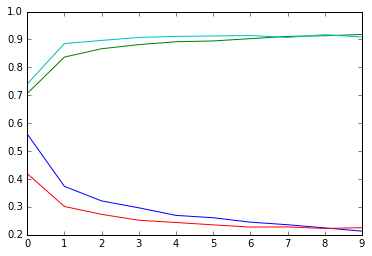

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(model.model.history.history['loss'])
plt.plot(model.model.history.history['acc'])
plt.plot(model.model.history.history['val_loss'])
plt.plot(model.model.history.history['val_acc'])
plt.show()